In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.value_counts().sum()

200

In [9]:
df.drop("CustomerID",axis=1,inplace=True)

In [10]:
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

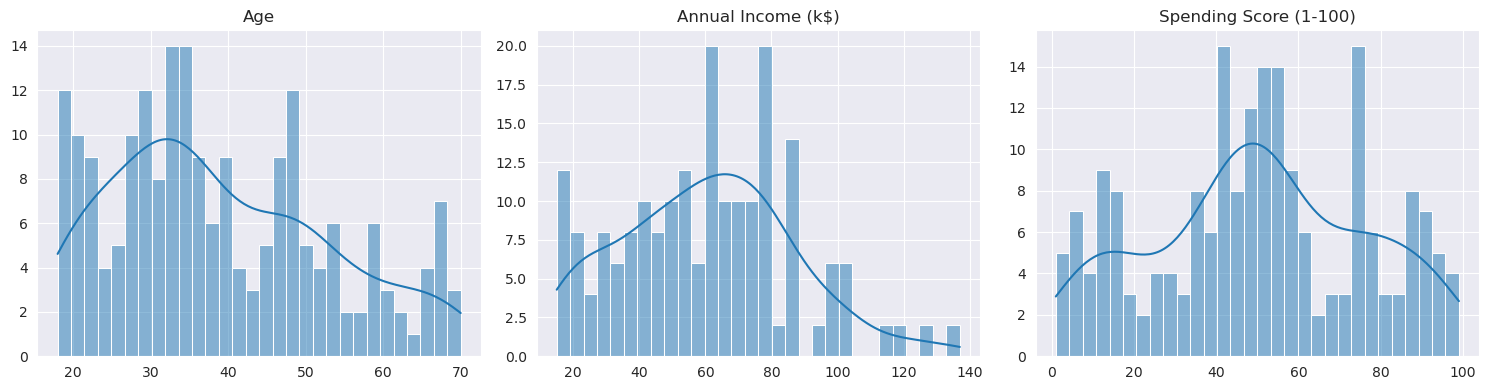

In [14]:
plot_all_histograms(df)

<Axes: xlabel='Genre', ylabel='count'>

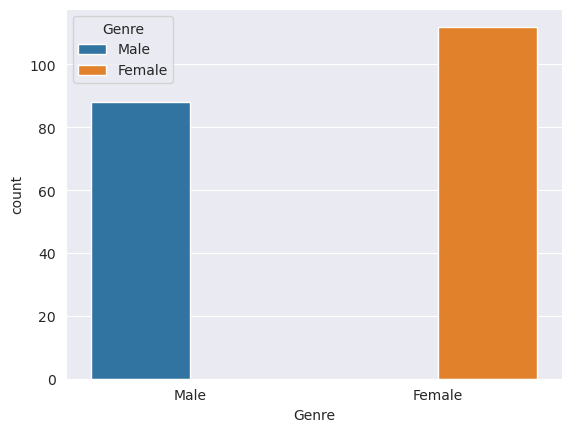

In [15]:
sns.countplot(data=df,x="Genre",hue="Genre")

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
df = pd.DataFrame(df_scaled, columns = df.columns)

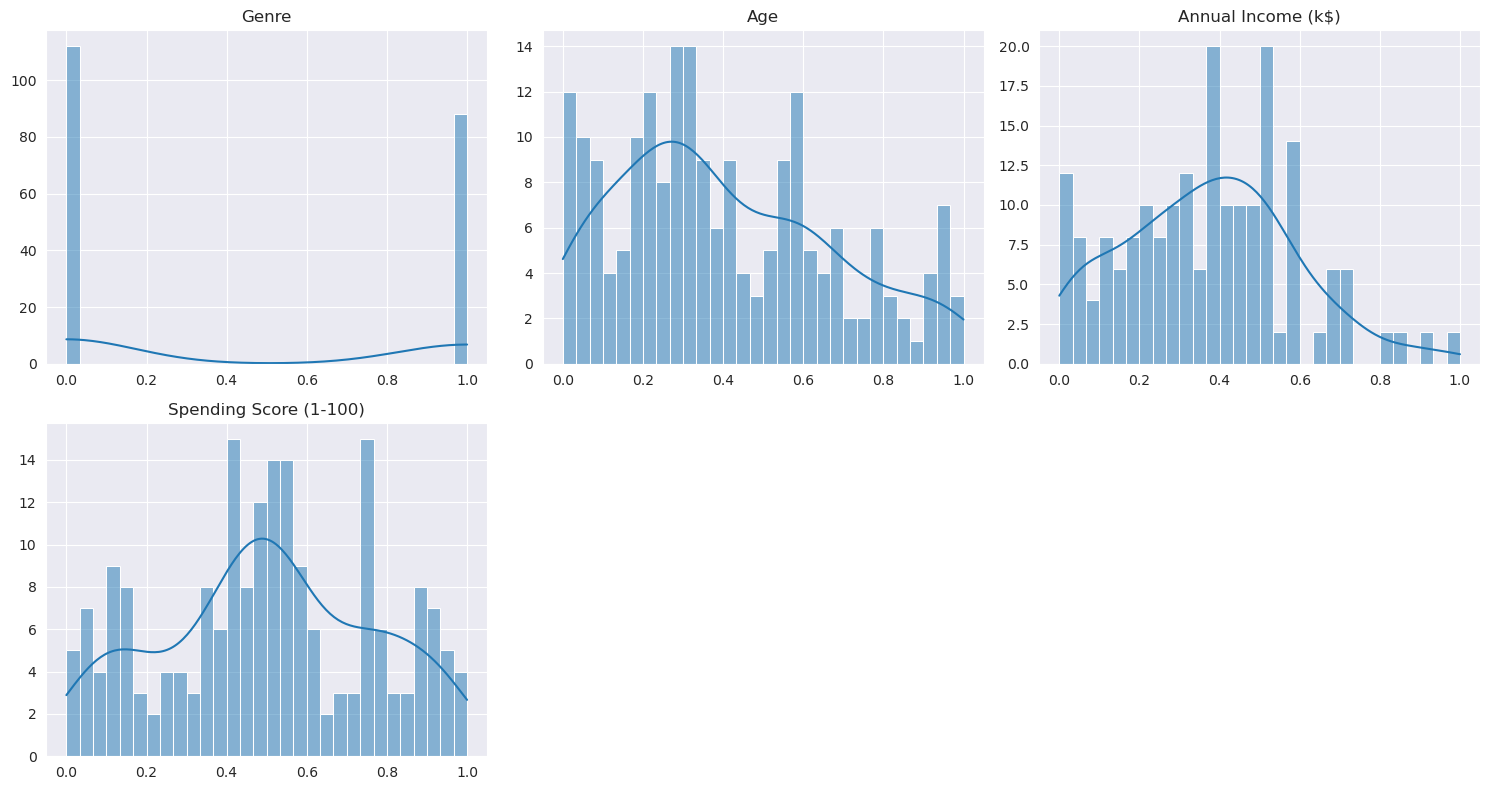

In [19]:
plot_all_histograms(df)

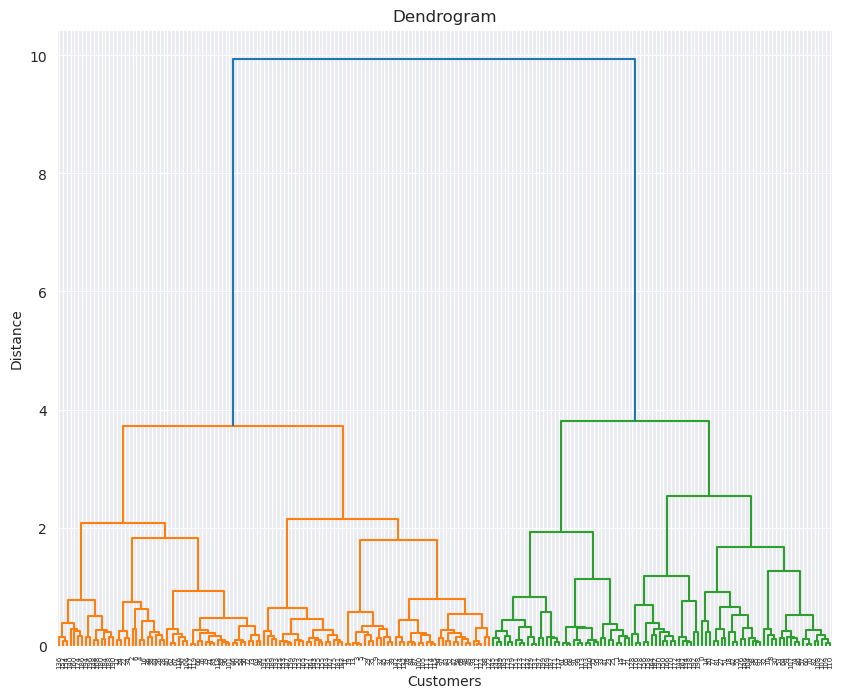

In [20]:
import scipy.cluster.hierarchy as sch

plt.figure(1, figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)
y_hc = hc.fit_predict(df)

In [22]:
df['cluster'] = pd.DataFrame(y_hc)

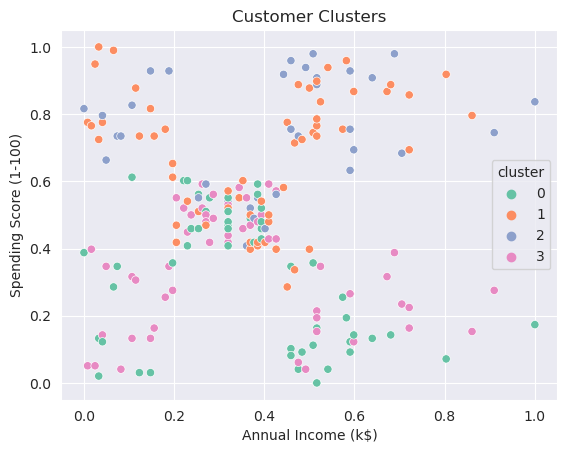

In [23]:
sns.scatterplot(data=df, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df, y_hc))

0.7143503785893516


In [25]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()

In [26]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X)
X['cluster'] = y_hc

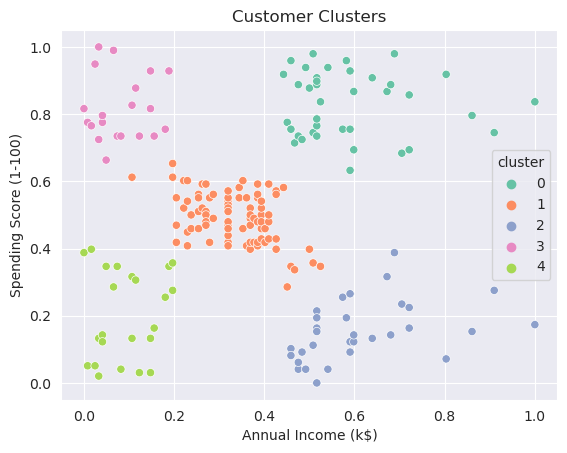

In [27]:
sns.scatterplot(data=X, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [29]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
#Rule of thumb: min_samples = 2 * number_of_feautures
min_samples = 2 * X.shape[1]
print(f"minimum samples: {min_samples}")
#Fit Nearest Neighbors

minimum samples: 4


In [32]:
#Standard Scaled and fit Neighbors
X_Scaled = StandardScaler().fit_transform(X)

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_Scaled)
distances= neighbors_fit.kneighbors(X_Scaled)[0]

#Sort distances from k-distance graph
distances = np.sort(distances[:,-1])

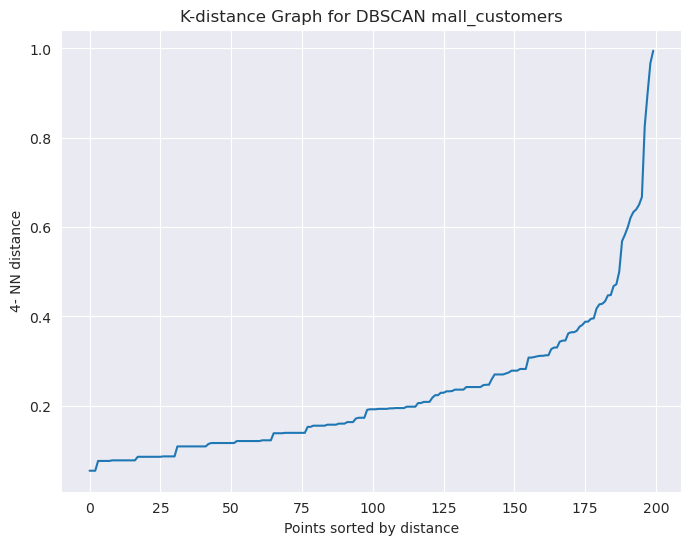

In [33]:
#Plot for eps value
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title("K-distance Graph for DBSCAN mall_customers")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}- NN distance")
plt.show()

In [36]:
#Apply DBSCAN
dbscan = DBSCAN(eps=0.28, min_samples=5)
labels = dbscan.fit_predict(X_Scaled)
noise = labels == -1
uniq = sorted(set(labels) - {-1})

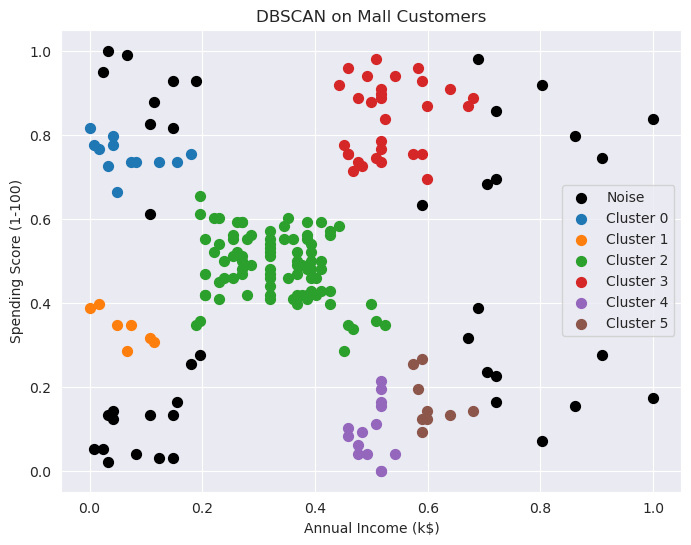

In [38]:
#Plot for DBSCAN
plt.figure(figsize=(8,6))
plt.scatter(df.loc[noise, 'Annual Income (k$)'],
            df.loc[noise, 'Spending Score (1-100)'],
            c='black', s=50, label='Noise')
for c in uniq:
    m = labels == c
    plt.scatter(df.loc[m, 'Annual Income (k$)'],
                df.loc[m, 'Spending Score (1-100)'],
                s=50, label=f'Cluster {c}')
plt.xlabel('Annual Income (k$)'); plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN on Mall Customers'); plt.legend(); plt.show()